In [159]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy.stats import ttest_ind
import csv

In [161]:
id_url = '/content/drive/My Drive/Colab Notebooks/Sprint Data Challenge/2019-05-02.csv'
reviews_url='/content/drive/My Drive/Colab Notebooks/Sprint Data Challenge/bgg-13m-reviews.csv'
gameinfo_url='/content/drive/My Drive/Colab Notebooks/Sprint Data Challenge/games_detailed_info.csv'

id_geekscore = pd.read_csv(id_url)
reviews = pd.read_csv(reviews_url)
gameinfo = pd.read_csv(gameinfo_url)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [162]:
id_geekscore.head()

,ID,Name,Year,Rank,Average,Bayes average,Users rated,URL,Thumbnail
0,174430,Gloomhaven,2017,1,8.90,8.611,24574,/boardgame/174430/gloomhaven,https://cf.geekdo-images.com/micro/img/8JYMPXd...
1,161936,Pandemic Legacy: Season 1,2015,2,8.64,8.489,30921,/boardgame/161936/pandemic-legacy-season-1,https://cf.geekdo-images.com/micro/img/KbAKyhb...
2,182028,Through the Ages: A New Story of Civilization,2015,3,8.53,8.258,15551,/boardgame/182028/through-ages-new-story-civil...,https://cf.geekdo-images.com/micro/img/APvZ_BY...
3,167791,Terraforming Mars,2016,4,8.40,8.242,38331,/boardgame/167791/terraforming-mars,https://cf.geekdo-images.com/micro/img/71v8jF5...
4,12333,Twilight Struggle,2005,5,8.33,8.175,34268,/boardgame/12333/twilight-struggle,https://cf.geekdo-images.com/micro/img/uStZr7_...


In [163]:
id_geekscore = id_geekscore.drop(['URL', 'Thumbnail'], axis=1)
id_geekscore

,ID,Name,Year,Rank,Average,Bayes average,Users rated
0,174430,Gloomhaven,2017,1,8.90,8.611,24574
1,161936,Pandemic Legacy: Season 1,2015,2,8.64,8.489,30921
2,182028,Through the Ages: A New Story of Civilization,2015,3,8.53,8.258,15551
3,167791,Terraforming Mars,2016,4,8.40,8.242,38331
4,12333,Twilight Struggle,2005,5,8.33,8.175,34268
...,...,...,...,...,...,...,...
17060,16398,War,0,17061,2.23,3.930,1140
17061,7316,Bingo,1530,17062,2.76,3.865,1794
17062,5048,Candy Land,1949,17063,3.17,3.756,3393
17063,5432,Chutes and Ladders,200,17064,2.81,3.566,3111


In [164]:
id_geekscore.shape

(17065, 7)

In [165]:
gameinfo.shape

(17063, 56)

In [166]:
reviews.shape

(13170073, 6)

In [167]:
id_geekscore['ID'].value_counts().sort_index()

1         1
2         1
3         1
4         1
5         1
         ..
271693    1
271785    1
271869    1
271896    1
272409    1
Name: ID, Length: 17065, dtype: int64

In [168]:
id_geekscore=id_geekscore.sort_values('ID')
id_geekscore

,ID,Name,Year,Rank,Average,Bayes average,Users rated
222,1,Die Macher,1986,223,7.63,7.187,4777
3094,2,Dragonmaster,1981,3095,6.62,5.827,523
187,3,Samurai,1998,188,7.44,7.255,13455
4032,4,Tal der Könige,1992,4033,6.61,5.721,324
223,5,Acquire,1964,224,7.35,7.186,16946
...,...,...,...,...,...,...,...
8691,271693,Wodny szlak,2019,8692,6.83,5.553,55
10253,271785,Slide Quest,2019,10254,7.03,5.535,34
7771,271869,Sushi Roll,2019,7772,7.61,5.567,48
10116,271896,Star Wars: Outer Rim,2019,10117,7.83,5.536,36


In [169]:
id_geekscore.loc[id_geekscore['ID']==13]

,ID,Name,Year,Rank,Average,Bayes average,Users rated
320,13,Catan,1995,321,7.19,7.038,84736


In [170]:
reviews.head()

,Unnamed: 0,user,rating,comment,ID,name
0,0,sidehacker,10.0,NaN,13,Catan
1,1,Varthlokkur,10.0,NaN,13,Catan
2,2,dougthonus,10.0,"Currently, this sits on my list as my favorite...",13,Catan
3,3,cypar7,10.0,"I know it says how many plays, but many, many ...",13,Catan
4,4,ssmooth,10.0,NaN,13,Catan


In [171]:
reviews.dtypes

Unnamed: 0      int64
user           object
rating        float64
comment        object
ID              int64
name           object
dtype: object

In [172]:
reviews= reviews.sort_values('ID')
reviews

,Unnamed: 0,user,rating,comment,ID,name
7156550,7180477,fobia,9.0,NaN,1,Die Macher
7158880,7182818,MarcusK,7.0,NaN,1,Die Macher
7158879,7182817,lucmoscrop,7.0,There is too much luck in this game for my tas...,1,Die Macher
7158878,7182816,An_Hö,7.0,NaN,1,Die Macher
7158877,7182815,ckraft,7.0,NaN,1,Die Macher
...,...,...,...,...,...,...
13140108,3326387,naTEhatfieldGG,10.0,NaN,272409,Tiny Epic Tactics
13140107,3326386,darrenwernergg,10.0,NaN,272409,Tiny Epic Tactics
13140106,3326385,GoblinGrrl,10.0,Kickstarter backer.,272409,Tiny Epic Tactics
13140121,3326400,goxoqecu4786,9.0,NaN,272409,Tiny Epic Tactics


In [173]:
temp_df = reviews[reviews['ID']==13]
temp_df['rating'].sum()/len(temp_df)

7.211525858836894

In [174]:
gameinfo.head()

,Unnamed: 0,Abstract Game Rank,Accessory Rank,Amiga Rank,Arcade Rank,Atari ST Rank,Board Game Rank,Children's Game Rank,Commodore 64 Rank,Customizable Rank,Family Game Rank,Party Game Rank,RPG Item Rank,Strategy Game Rank,Thematic Rank,Video Game Rank,War Game Rank,alternate,average,averageweight,bayesaverage,boardgameartist,boardgamecategory,boardgamecompilation,boardgamedesigner,boardgameexpansion,boardgamefamily,boardgameimplementation,boardgameintegration,boardgamemechanic,boardgamepublisher,description,id,image,maxplayers,maxplaytime,median,minage,minplayers,minplaytime,numcomments,numweights,owned,playingtime,primary,stddev,suggested_language_dependence,suggested_num_players,suggested_playerage,thumbnail,trading,type,usersrated,wanting,wishing,yearpublished
0,0,NaN,NaN,NaN,NaN,NaN,327,NaN,NaN,NaN,84.0,NaN,NaN,313.0,NaN,NaN,NaN,"['CATAN', 'Catan (Колонизаторы)', 'Catan: Das ...",7.19118,2.3399,7.03556,"['Volkan Baga', 'Tanja Donner', 'Pete Fenlon',...",['Negotiation'],"[""CATAN 3D Collector's Edition"", 'Catan: Big B...",['Klaus Teuber'],"['20 Jahre Darmstadt Spielt', 'Brettspiel Adve...","['Catan', 'Promotional Board Games']","[""CATAN 3D Collector's Edition"", 'Catan Geogra...",NaN,"['Dice Rolling', 'Modular Board', 'Route/Netwo...","['KOSMOS', '999 Games', 'Albi', 'Astrel Games'...","In Catan (formerly The Settlers of Catan), pla...",13,https://cf.geekdo-images.com/original/img/A-0y...,4,120,0,10,3,60,16330,6866,125254,120,Catan,1.47121,"[OrderedDict([('@level', '36'), ('@value', 'No...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/g8LvJsd...,1685,boardgame,85332,453,4729,1995
1,1,NaN,NaN,NaN,NaN,NaN,151,NaN,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN,"['Carcassonne Jubilee Edition', 'Carcassonne: ...",7.42605,1.9247,7.32084,"['Doris Matthäus', 'Anne Pätzke', 'Chris Quill...","['City Building', 'Medieval', 'Territory Build...","['Carcassonne Big Box', 'Carcassonne Big Box 2...",['Klaus-Jürgen Wrede'],"['20 Jahre Darmstadt Spielt', 'Apothecaries An...","['Carcassonne', 'Country: France']","['The Ark of the Covenant', 'Carcassonne: Amaz...",['Carcassonne: Wheel of Fortune'],"['Area Control / Area Influence', 'Tile Placem...","['Hans im Glück', '999 Games', 'Albi', 'Bard C...",Carcassonne is a tile-placement game in which ...,822,https://cf.geekdo-images.com/original/img/o4p6...,5,45,0,8,2,30,16180,6950,121717,45,Carcassonne,1.30292,"[OrderedDict([('@level', '1'), ('@value', 'No ...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/kqE4YJS...,1477,boardgame,85052,498,5403,2000
2,2,NaN,NaN,NaN,NaN,NaN,74,NaN,NaN,NaN,7.0,NaN,NaN,87.0,NaN,NaN,NaN,"['EPIZOotic', 'Pandemia', 'Pandemia 10 Anivers...",7.63799,2.4220,7.54432,"['Josh Cappel', 'Christian Hanisch', 'Régis Mo...",['Medical'],NaN,['Matt Leacock'],['Pandemic: Gen Con 2016 Promos – Z-Force Team...,['Pandemic'],"['Pandemic Legacy: Season 1', 'Pandemic Legacy...",NaN,"['Action Point Allowance System', 'Cooperative...","['Z-Man Games, Inc.', '(Unknown)', 'Albi', 'As...","In Pandemic, several virulent diseases have br...",30549,https://cf.geekdo-images.com/original/img/j-pf...,4,45,0,8,2,45,14127,4881,123067,45,Pandemic,1.32212,"[OrderedDict([('@level', '21'), ('@value', 'No...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/HEKrtpT...,1977,boardgame,83486,614,7655,2008
3,3,NaN,NaN,NaN,NaN,NaN,45,NaN,NaN,NaN,3.0,NaN,NaN,48.0,NaN,NaN,NaN,"['7 csoda', '7 Cudów Świata', '7 divů světa', ...",7.78118,2.3397,7.68858,"['Antoine Bauza', 'Miguel Coimbra']","['Ancient', 'Card Game', 'City Building', 'Civ...",NaN,['Antoine Bauza'],"['7 Wonders: Armada', '7 Wonders: Babel', '7 W...","['7 Wonders', 'Tableau Building']",['7 Wonders Duel'],NaN,"['Card Drafting', 'Hand Management', 'Set Coll...","['Repos Productio

In [175]:
gameinfo['yearpublished'].value_counts(ascending=False)[:15]

2016    1125
2017    1081
2015    1035
2018     909
2014     906
2013     799
2012     770
2011     688
2010     654
2009     599
2008     551
2005     522
2007     510
2006     491
2004     469
Name: yearpublished, dtype: int64

In [176]:
gameinfo[gameinfo['yearpublished']<1916]

,Unnamed: 0,Abstract Game Rank,Accessory Rank,Amiga Rank,Arcade Rank,Atari ST Rank,Board Game Rank,Children's Game Rank,Commodore 64 Rank,Customizable Rank,Family Game Rank,Party Game Rank,RPG Item Rank,Strategy Game Rank,Thematic Rank,Video Game Rank,War Game Rank,alternate,average,averageweight,bayesaverage,boardgameartist,boardgamecategory,boardgamecompilation,boardgamedesigner,boardgameexpansion,boardgamefamily,boardgameimplementation,boardgameintegration,boardgamemechanic,boardgamepublisher,description,id,image,maxplayers,maxplaytime,median,minage,minplayers,minplaytime,numcomments,numweights,owned,playingtime,primary,stddev,suggested_language_dependence,suggested_num_players,suggested_playerage,thumbnail,trading,type,usersrated,wanting,wishing,yearpublished
57,57,46.0,NaN,NaN,NaN,NaN,430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Ajax Chessmen', 'Ajedrez', 'Ajedrez con Relo...",7.10203,3.7257,6.92788,"['(Uncredited)', 'Paolo Chiari', 'Honoré Daumi...",['Abstract Strategy'],"['Ancient Conflict Treasure Chest', 'Apocalyps...",['(Uncredited)'],"['Beguile: PaWN The Enemy', 'Castle-Mate', 'Ch...","['Chess Games', 'Combinatorial', '3M Bookshelf...",NaN,"['CHUCK-A-CHESS', 'Code Geass: Knightmare Ches...",['Grid Movement'],"['(Public Domain)', '(Unknown)', '3M', 'Adams ...","Chess is a two-player, abstract strategy board...",171,https://cf.geekdo-images.com/original/img/kjE_...,2,60,0,6,2,60,5878,2074,33108,60,Chess,1.834470,"[OrderedDict([('@level', '16'), ('@value', 'No...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/v4iQ22p...,160,boardgame,24349,25,225,1475
170,170,8.0,NaN,NaN,NaN,NaN,138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Atari Go', 'Baduk', 'Cờ Vây', 'The Game of G...",7.64399,3.9909,7.35276,"['(Uncredited)', 'Barbro Hennius', 'Norman Som...",['Abstract Strategy'],"['The 15 Greatest Board Games in the World', '...",['(Uncredited)'],"['Joker Go', 'Poker-Go']","['3M Bookshelf Series', 'Combinatorial', 'Go',...",NaN,NaN,['Area Enclosure'],"['(Public Domain)', '(Self-Published)', '(Unkn...","By all appearances, it's just two players taki...",188,https://cf.geekdo-images.com/original/img/bCv9...,2,180,0,8,2,30,3412,1314,17915,180,Go,1.910830,"[OrderedDict([('@level', '31'), ('@value', 'No...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/jldK9or...,270,boardgame,13238,139,1350,-2200
211,211,NaN,NaN,NaN,NaN,NaN,611,NaN,NaN,NaN,145.0,44.0,NaN,NaN,NaN,NaN,NaN,"[""Animal House Liar's Dice"", 'Blef', 'Blöff', ...",6.91821,1.2619,6.75433,"['(Uncredited)', 'Rita Åse', 'Bildgården AB', ...","['Bluffing', 'Dice', 'Movies / TV / Radio them...","['The Boardgame Book', ""Pirates of the Caribbe...","['(Uncredited)', 'Richard Borg']",NaN,"['Celebrities: Walt Disney', 'Dice cup bluffin...",['Bluff Jubiläumsausgabe'],NaN,"['Betting/Wagering', 'Dice Rolling', 'Player E...","['(Public Domain)', 'Endless Games (I)', 'F.X....","Liar's Dice, a.k.a. Bluff, Perudo or Dudo, is ...",45,https://cf.geekdo-images.com/original/img/MPoR...,6,30,0,8,2,15,3362,882,14048,30,Liar's Dice,1.400000,"[OrderedDict([('@level', '1'), ('@value', 'No ...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/vecaeBQ...,365,boardgame,11180,125,825,1800
233,233,129.0,NaN,NaN,NaN,NaN,1189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Acey-Deucy (variation)', 'Aqua Player Float...",6.52820,2.0207,6.36061,"['(Uncredited)', 'Willem Cornelisz Duyster']","['Abstract Strategy', 'Dice']","['The Boardgame Book', 'The Book of Classic Bo...",['(Uncredited)'],"['Backgammon: Zombie Rush', 'Dargammon', 'Wham...","['3M Bookshelf Series', 'Characters: Austin Po...",NaN,NaN,"['Betting/Wagering', 'Dice Rolling', 'Roll / S...","['(Public Domain)', '(Unknown)', '3M', 'Alga',...",Backgammon is a classic abst

In [177]:
gameinfo.isnull().sum()

Unnamed: 0                           0
Abstract Game Rank               16110
Accessory Rank                   17062
Amiga Rank                       17062
Arcade Rank                      17062
Atari ST Rank                    17062
Board Game Rank                      0
Children's Game Rank             16296
Commodore 64 Rank                17062
Customizable Rank                16783
Family Game Rank                 15257
Party Game Rank                  16538
RPG Item Rank                    17062
Strategy Game Rank               15163
Thematic Rank                    16026
Video Game Rank                  17062
War Game Rank                    14142
alternate                        10140
average                              0
averageweight                        0
bayesaverage                         0
boardgameartist                   4913
boardgamecategory                  184
boardgamecompilation             16511
boardgamedesigner                  338
boardgameexpansion       

In [178]:
gameinfo.columns

Index(['Unnamed: 0', 'Abstract Game Rank', 'Accessory Rank', 'Amiga Rank',
       'Arcade Rank', 'Atari ST Rank', 'Board Game Rank',
       'Children's Game Rank', 'Commodore 64 Rank', 'Customizable Rank',
       'Family Game Rank', 'Party Game Rank', 'RPG Item Rank',
       'Strategy Game Rank', 'Thematic Rank', 'Video Game Rank',
       'War Game Rank', 'alternate', 'average', 'averageweight',
       'bayesaverage', 'boardgameartist', 'boardgamecategory',
       'boardgamecompilation', 'boardgamedesigner', 'boardgameexpansion',
       'boardgamefamily', 'boardgameimplementation', 'boardgameintegration',
       'boardgamemechanic', 'boardgamepublisher', 'description', 'id', 'image',
       'maxplayers', 'maxplaytime', 'median', 'minage', 'minplayers',
       'minplaytime', 'numcomments', 'numweights', 'owned', 'playingtime',
       'primary', 'stddev', 'suggested_language_dependence',
       'suggested_num_players', 'suggested_playerage', 'thumbnail', 'trading',
       'type', 'usersr

In [179]:
drop_cols = ['Unnamed: 0','alternate','boardgameartist','boardgamecompilation',
             'boardgameexpansion', 'boardgamefamily','boardgameimplementation',
             'boardgameintegration','boardgamepublisher','description', 'image',
             'numcomments','numweights','suggested_language_dependence',
             'suggested_num_players', 'suggested_playerage','thumbnail',
             'trading','wanting','wishing','Accessory Rank','Amiga Rank','Arcade Rank','Atari ST Rank',
             'Commodore 64 Rank','RPG Item Rank','Video Game Rank',]

gameinfo = gameinfo.drop(drop_cols, axis=1)
gameinfo

,Abstract Game Rank,Board Game Rank,Children's Game Rank,Customizable Rank,Family Game Rank,Party Game Rank,Strategy Game Rank,Thematic Rank,War Game Rank,average,averageweight,bayesaverage,boardgamecategory,boardgamedesigner,boardgamemechanic,id,maxplayers,maxplaytime,median,minage,minplayers,minplaytime,owned,playingtime,primary,stddev,type,usersrated,yearpublished
0,NaN,327,NaN,NaN,84.0,NaN,313.0,NaN,NaN,7.19118,2.3399,7.03556,['Negotiation'],['Klaus Teuber'],"['Dice Rolling', 'Modular Board', 'Route/Netwo...",13,4,120,0,10,3,60,125254,120,Catan,1.47121,boardgame,85332,1995
1,NaN,151,NaN,NaN,23.0,NaN,NaN,NaN,NaN,7.42605,1.9247,7.32084,"['City Building', 'Medieval', 'Territory Build...",['Klaus-Jürgen Wrede'],"['Area Control / Area Influence', 'Tile Placem...",822,5,45,0,8,2,30,121717,45,Carcassonne,1.30292,boardgame,85052,2000
2,NaN,74,NaN,NaN,7.0,NaN,87.0,NaN,NaN,7.63799,2.4220,7.54432,['Medical'],['Matt Leacock'],"['Action Point Allowance System', 'Cooperative...",30549,4,45,0,8,2,45,123067,45,Pandemic,1.32212,boardgame,83486,2008
3,NaN,45,NaN,NaN,3.0,NaN,48.0,NaN,NaN,7.78118,2.3397,7.68858,"['Ancient', 'Card Game', 'City Building', 'Civ...",['Antoine Bauza'],"['Card Drafting', 'Hand Management', 'Set Coll...",68448,7,30,0,10,2,30,91037,30,7 Wonders,1.27559,boardgame,69132,2010
4,NaN,76,NaN,NaN,NaN,NaN,76.0,NaN,NaN,7.64470,2.3623,7.54296,"['Card Game', 'Medieval']",['Donald X. Vaccarino'],"['Card Drafting', 'Deck / Pool Building', 'Han...",36218,4,30,0,13,2,30,88729,30,Dominion,1.42599,boardgame,68284,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17058,NaN,12961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.93667,1.0000,5.51052,"['Animals', ""Children's Game""]","['Alan R. Moon', 'Aaron Weissblum']",NaN,10809,5,20,0,5,3,20,46,20,Immer oben auf!,1.31896,boardgame,30,2004
17059,NaN,15499,NaN,NaN,NaN,NaN,NaN,NaN,2861.0,4.74000,2.3750,5.47984,"['Civilization', 'Environmental', 'Modern Warf...","['Frank Zuuring', 'Peter Zuuring']","['Area Movement', 'Campaign / Battle Card Driv...",23257,4,120,0,8,2,120,57,120,Antarctica (first edition),1.86362,boardgame,30,2006
17060,NaN,14315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.40000,2.5000,5.49719,"['Adventure', 'Deduction']",['Thomas Kotulla'],NaN,9272,6,90,0,8,2,90,124,90,Jade König,1.27410,boardgame,30,1986
17061,NaN,14317,NaN,NaN,NaN,NaN,NaN,NaN,2751.0,5.80000,2.7500,5.49718,"['Napoleonic', 'Wargame']",['Roger Sandell'],['Hex-and-Counter'],13392,2,0,0,12,2,0,241,0,Perfidious Albion: Napoleon's (Hypothetical) I...,1.84662,boardgame,30,1997


In [180]:
gameinfo = gameinfo.rename({"Children's Game Rank": 'Childrens Game Rank'}, axis = 1)
gameinfo = gameinfo.rename({"average": 'Review_average'}, axis = 1)
gameinfo = gameinfo.rename({"bayesaverage": 'Review_bayesaverage'}, axis = 1)
gameinfo

,Abstract Game Rank,Board Game Rank,Childrens Game Rank,Customizable Rank,Family Game Rank,Party Game Rank,Strategy Game Rank,Thematic Rank,War Game Rank,Review_average,averageweight,Review_bayesaverage,boardgamecategory,boardgamedesigner,boardgamemechanic,id,maxplayers,maxplaytime,median,minage,minplayers,minplaytime,owned,playingtime,primary,stddev,type,usersrated,yearpublished
0,NaN,327,NaN,NaN,84.0,NaN,313.0,NaN,NaN,7.19118,2.3399,7.03556,['Negotiation'],['Klaus Teuber'],"['Dice Rolling', 'Modular Board', 'Route/Netwo...",13,4,120,0,10,3,60,125254,120,Catan,1.47121,boardgame,85332,1995
1,NaN,151,NaN,NaN,23.0,NaN,NaN,NaN,NaN,7.42605,1.9247,7.32084,"['City Building', 'Medieval', 'Territory Build...",['Klaus-Jürgen Wrede'],"['Area Control / Area Influence', 'Tile Placem...",822,5,45,0,8,2,30,121717,45,Carcassonne,1.30292,boardgame,85052,2000
2,NaN,74,NaN,NaN,7.0,NaN,87.0,NaN,NaN,7.63799,2.4220,7.54432,['Medical'],['Matt Leacock'],"['Action Point Allowance System', 'Cooperative...",30549,4,45,0,8,2,45,123067,45,Pandemic,1.32212,boardgame,83486,2008
3,NaN,45,NaN,NaN,3.0,NaN,48.0,NaN,NaN,7.78118,2.3397,7.68858,"['Ancient', 'Card Game', 'City Building', 'Civ...",['Antoine Bauza'],"['Card Drafting', 'Hand Management', 'Set Coll...",68448,7,30,0,10,2,30,91037,30,7 Wonders,1.27559,boardgame,69132,2010
4,NaN,76,NaN,NaN,NaN,NaN,76.0,NaN,NaN,7.64470,2.3623,7.54296,"['Card Game', 'Medieval']",['Donald X. Vaccarino'],"['Card Drafting', 'Deck / Pool Building', 'Han...",36218,4,30,0,13,2,30,88729,30,Dominion,1.42599,boardgame,68284,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17058,NaN,12961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.93667,1.0000,5.51052,"['Animals', ""Children's Game""]","['Alan R. Moon', 'Aaron Weissblum']",NaN,10809,5,20,0,5,3,20,46,20,Immer oben auf!,1.31896,boardgame,30,2004
17059,NaN,15499,NaN,NaN,NaN,NaN,NaN,NaN,2861.0,4.74000,2.3750,5.47984,"['Civilization', 'Environmental', 'Modern Warf...","['Frank Zuuring', 'Peter Zuuring']","['Area Movement', 'Campaign / Battle Card Driv...",23257,4,120,0,8,2,120,57,120,Antarctica (first edition),1.86362,boardgame,30,2006
17060,NaN,14315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.40000,2.5000,5.49719,"['Adventure', 'Deduction']",['Thomas Kotulla'],NaN,9272,6,90,0,8,2,90,124,90,Jade König,1.27410,boardgame,30,1986
17061,NaN,14317,NaN,NaN,NaN,NaN,NaN,NaN,2751.0,5.80000,2.7500,5.49718,"['Napoleonic', 'Wargame']",['Roger Sandell'],['Hex-and-Counter'],13392,2,0,0,12,2,0,241,0,Perfidious Albion: Napoleon's (Hypothetical) I...,1.84662,boardgame,30,1997


In [181]:
gameinfo.isnull().sum()

Abstract Game Rank     16110
Board Game Rank            0
Childrens Game Rank    16296
Customizable Rank      16783
Family Game Rank       15257
Party Game Rank        16538
Strategy Game Rank     15163
Thematic Rank          16026
War Game Rank          14142
Review_average             0
averageweight              0
Review_bayesaverage        0
boardgamecategory        184
boardgamedesigner        338
boardgamemechanic       1564
id                         0
maxplayers                 0
maxplaytime                0
median                     0
minage                     0
minplayers                 0
minplaytime                0
owned                      0
playingtime                0
primary                    0
stddev                     0
type                       0
usersrated                 0
yearpublished              0
dtype: int64

In [182]:
gameinfo.dtypes

Abstract Game Rank     float64
Board Game Rank         object
Childrens Game Rank    float64
Customizable Rank      float64
Family Game Rank       float64
Party Game Rank        float64
Strategy Game Rank     float64
Thematic Rank          float64
War Game Rank          float64
Review_average         float64
averageweight          float64
Review_bayesaverage    float64
boardgamecategory       object
boardgamedesigner       object
boardgamemechanic       object
id                       int64
maxplayers               int64
maxplaytime              int64
median                   int64
minage                   int64
minplayers               int64
minplaytime              int64
owned                    int64
playingtime              int64
primary                 object
stddev                 float64
type                    object
usersrated               int64
yearpublished            int64
dtype: object

In [183]:
gameinfo['Board Game Rank'].value_counts().sort_values(ascending=False)

Not Ranked    6
17            1
3             1
4             1
5             1
             ..
14964         1
14464         1
13818         1
13302         1
8556          1
Name: Board Game Rank, Length: 17058, dtype: int64

In [184]:
gameinfo['Board Game Rank'] = gameinfo['Board Game Rank'].replace({'Not Ranked': np.nan})
gameinfo['Board Game Rank'].value_counts()

14023    1
5681     1
5695     1
5694     1
5693     1
        ..
11615    1
11614    1
11613    1
11612    1
1        1
Name: Board Game Rank, Length: 17057, dtype: int64

In [185]:
gameinfo['Board Game Rank'].isnull().sum()

6

In [186]:
gameinfo['Board Game Rank'] = gameinfo['Board Game Rank'].astype(float)
gameinfo['Board Game Rank'].dtype

dtype('float64')

In [187]:
gameinfo['boardgamecategory'] = gameinfo['boardgamecategory'].astype(str)
gameinfo['boardgamedesigner'] = gameinfo['boardgamedesigner'].astype(str)
gameinfo['boardgamemechanic'] = gameinfo['boardgamemechanic'].astype(str)
gameinfo.dtypes

Abstract Game Rank     float64
Board Game Rank        float64
Childrens Game Rank    float64
Customizable Rank      float64
Family Game Rank       float64
Party Game Rank        float64
Strategy Game Rank     float64
Thematic Rank          float64
War Game Rank          float64
Review_average         float64
averageweight          float64
Review_bayesaverage    float64
boardgamecategory       object
boardgamedesigner       object
boardgamemechanic       object
id                       int64
maxplayers               int64
maxplaytime              int64
median                   int64
minage                   int64
minplayers               int64
minplaytime              int64
owned                    int64
playingtime              int64
primary                 object
stddev                 float64
type                    object
usersrated               int64
yearpublished            int64
dtype: object

In [0]:
def remove_special_characters(word):
  return str(word.strip("[]"))

In [0]:
def remove_quotations(word):
  return str(word.replace("'","").replace('"',''))

In [190]:
gameinfo['boardgamecategory'] = gameinfo['boardgamecategory'].apply(remove_special_characters).apply(remove_quotations)
gameinfo['boardgamedesigner'] = gameinfo['boardgamedesigner'].apply(remove_special_characters).apply(remove_quotations)
gameinfo['boardgamemechanic'] = gameinfo['boardgamemechanic'].apply(remove_special_characters).apply(remove_quotations)
print(gameinfo['boardgamecategory'], '\n')
print(gameinfo['boardgamedesigner'], '\n')
print(gameinfo['boardgamemechanic'], '\n')

0                                              Negotiation
1              City Building, Medieval, Territory Building
2                                                  Medical
3          Ancient, Card Game, City Building, Civilization
4                                      Card Game, Medieval
                               ...                        
17058                              Animals, Childrens Game
17059    Civilization, Environmental, Modern Warfare, P...
17060                                 Adventure, Deduction
17061                                  Napoleonic, Wargame
17062                                    Puzzle, Word Game
Name: boardgamecategory, Length: 17063, dtype: object 

0                         Klaus Teuber
1                   Klaus-Jürgen Wrede
2                         Matt Leacock
3                        Antoine Bauza
4                  Donald X. Vaccarino
                     ...              
17058    Alan R. Moon, Aaron Weissblum
17059     Frank Zuurin

In [191]:
gameinfo

,Abstract Game Rank,Board Game Rank,Childrens Game Rank,Customizable Rank,Family Game Rank,Party Game Rank,Strategy Game Rank,Thematic Rank,War Game Rank,Review_average,averageweight,Review_bayesaverage,boardgamecategory,boardgamedesigner,boardgamemechanic,id,maxplayers,maxplaytime,median,minage,minplayers,minplaytime,owned,playingtime,primary,stddev,type,usersrated,yearpublished
0,NaN,327.0,NaN,NaN,84.0,NaN,313.0,NaN,NaN,7.19118,2.3399,7.03556,Negotiation,Klaus Teuber,"Dice Rolling, Modular Board, Route/Network Bui...",13,4,120,0,10,3,60,125254,120,Catan,1.47121,boardgame,85332,1995
1,NaN,151.0,NaN,NaN,23.0,NaN,NaN,NaN,NaN,7.42605,1.9247,7.32084,"City Building, Medieval, Territory Building",Klaus-Jürgen Wrede,"Area Control / Area Influence, Tile Placement",822,5,45,0,8,2,30,121717,45,Carcassonne,1.30292,boardgame,85052,2000
2,NaN,74.0,NaN,NaN,7.0,NaN,87.0,NaN,NaN,7.63799,2.4220,7.54432,Medical,Matt Leacock,"Action Point Allowance System, Cooperative Pla...",30549,4,45,0,8,2,45,123067,45,Pandemic,1.32212,boardgame,83486,2008
3,NaN,45.0,NaN,NaN,3.0,NaN,48.0,NaN,NaN,7.78118,2.3397,7.68858,"Ancient, Card Game, City Building, Civilization",Antoine Bauza,"Card Drafting, Hand Management, Set Collection...",68448,7,30,0,10,2,30,91037,30,7 Wonders,1.27559,boardgame,69132,2010
4,NaN,76.0,NaN,NaN,NaN,NaN,76.0,NaN,NaN,7.64470,2.3623,7.54296,"Card Game, Medieval",Donald X. Vaccarino,"Card Drafting, Deck / Pool Building, Hand Mana...",36218,4,30,0,13,2,30,88729,30,Dominion,1.42599,boardgame,68284,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17058,NaN,12961.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.93667,1.0000,5.51052,"Animals, Childrens Game","Alan R. Moon, Aaron Weissblum",nan,10809,5,20,0,5,3,20,46,20,Immer oben auf!,1.31896,boardgame,30,2004
17059,NaN,15499.0,NaN,NaN,NaN,NaN,NaN,NaN,2861.0,4.74000,2.3750,5.47984,"Civilization, Environmental, Modern Warfare, P...","Frank Zuuring, Peter Zuuring","Area Movement, Campaign / Battle Card Driven, ...",23257,4,120,0,8,2,120,57,120,Antarctica (first edition),1.86362,boardgame,30,2006
17060,NaN,14315.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.40000,2.5000,5.49719,"Adventure, Deduction",Thomas Kotulla,nan,9272,6,90,0,8,2,90,124,90,Jade König,1.27410,boardgame,30,1986
17061,NaN,14317.0,NaN,NaN,NaN,NaN,NaN,NaN,2751.0,5.80000,2.7500,5.49718,"Napoleonic, Wargame",Roger Sandell,Hex-and-Counter,13392,2,0,0,12,2,0,241,0,Perfidious Albion: Napoleon's (Hypothetical) I...,1.84662,boardgame,30,1997


In [192]:
top_rank100 = gameinfo[gameinfo['Board Game Rank']<=100]
top_rank100

,Abstract Game Rank,Board Game Rank,Childrens Game Rank,Customizable Rank,Family Game Rank,Party Game Rank,Strategy Game Rank,Thematic Rank,War Game Rank,Review_average,averageweight,Review_bayesaverage,boardgamecategory,boardgamedesigner,boardgamemechanic,id,maxplayers,maxplaytime,median,minage,minplayers,minplaytime,owned,playingtime,primary,stddev,type,usersrated,yearpublished
2,NaN,74.0,NaN,NaN,7.0,NaN,87.0,NaN,NaN,7.63799,2.4220,7.54432,Medical,Matt Leacock,"Action Point Allowance System, Cooperative Pla...",30549,4,45,0,8,2,45,123067,45,Pandemic,1.32212,boardgame,83486,2008
3,NaN,45.0,NaN,NaN,3.0,NaN,48.0,NaN,NaN,7.78118,2.3397,7.68858,"Ancient, Card Game, City Building, Civilization",Antoine Bauza,"Card Drafting, Hand Management, Set Collection...",68448,7,30,0,10,2,30,91037,30,7 Wonders,1.27559,boardgame,69132,2010
4,NaN,76.0,NaN,NaN,NaN,NaN,76.0,NaN,NaN,7.64470,2.3623,7.54296,"Card Game, Medieval",Donald X. Vaccarino,"Card Drafting, Deck / Pool Building, Hand Mana...",36218,4,30,0,13,2,30,88729,30,Dominion,1.42599,boardgame,68284,2008
6,NaN,25.0,NaN,NaN,NaN,NaN,26.0,NaN,NaN,7.98857,3.6356,7.88432,"Animals, Economic, Farming",Uwe Rosenberg,"Area Enclosure, Card Drafting, Hand Management...",31260,5,150,0,12,1,30,68487,150,Agricola,1.56493,boardgame,57064,2007
7,NaN,20.0,NaN,NaN,NaN,NaN,24.0,NaN,NaN,8.03590,3.2887,7.91934,"City Building, Economic, Farming",Andreas Seyfarth,Variable Phase Order,3076,5,150,0,12,3,90,65642,150,Puerto Rico,1.38294,boardgame,56538,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,NaN,14.0,NaN,NaN,NaN,NaN,9.0,NaN,NaN,8.60949,3.8722,8.00868,"Economic, Industry / Manufacturing, Transporta...","Gavan Brown, Matt Tolman, Martin Wallace","Hand Management, Route/Network Building",224517,4,120,0,14,2,60,10482,120,Brass: Birmingham,1.18431,boardgame,5748,2018
522,NaN,87.0,NaN,NaN,NaN,NaN,67.0,NaN,NaN,8.06597,2.8125,7.48677,"Card Game, Fantasy, Science Fiction",Kevin Riley,"Card Drafting, Cooperative Play, Deck / Pool B...",191189,4,60,0,14,1,60,8624,60,Aeon's End,1.34995,boardgame,5276,2016
574,NaN,82.0,NaN,NaN,NaN,NaN,58.0,NaN,NaN,8.12485,3.4072,7.50404,"Animals, Economic, Farming",Uwe Rosenberg,"Area Enclosure, Card Drafting, Hand Management...",200680,4,120,0,12,1,30,6925,120,Agricola (Revised Edition),1.48322,boardgame,4801,2016
598,NaN,98.0,NaN,NaN,NaN,NaN,61.0,NaN,NaN,7.99729,3.7205,7.45570,Ancient,Daniele Tascini,"Area Movement, Point to Point Movement, Rondel...",229853,4,120,0,12,1,90,7963,120,Teotihuacan: City of Gods,1.27986,boardgame,4889,2018


In [193]:
category_list=gameinfo['boardgamecategory']
category_list =category_list.tolist()
temp=[]
for x in range(0,len(category_list)):
  if "," in category_list[x]:
    temp.extend(category_list[x].split(','))
  else:
    temp.append(category_list[x])
category_list = temp
category_list = [x.replace(" ","") for x in category_list]

cat_list_ten = pd.Series(category_list).value_counts(normalize=True)[:10]

category_list = pd.Series(category_list).value_counts()
category_list

CardGame                 4930
Wargame                  3191
Fantasy                  2012
PartyGame                1457
Dice                     1449
                         ... 
PikeandShot                40
GameSystem                 31
AmericanIndianWars         28
KoreanWar                  19
ExpansionforBase-game      18
Length: 84, dtype: int64

In [194]:
top_ten_type_all =category_list[:10].index
top_ten_type_all= list(top_ten_type_all)
top_ten_type_all

['CardGame',
 'Wargame',
 'Fantasy',
 'PartyGame',
 'Dice',
 'Fighting',
 'ScienceFiction',
 'ChildrensGame',
 'AbstractStrategy',
 'Economic']

In [0]:
top_rank100_temp = top_rank100[top_rank100['yearpublished']>1940]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


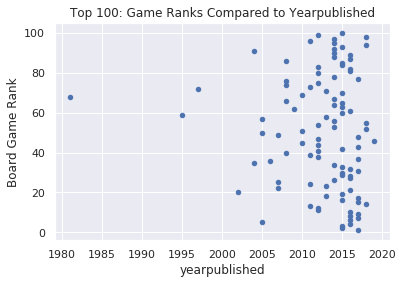

In [244]:
sns.set(font_scale=1);
top_rank100_temp.plot.scatter('yearpublished', 'Board Game Rank');
plt.title('Top 100: Game Ranks Compared to Yearpublished');

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


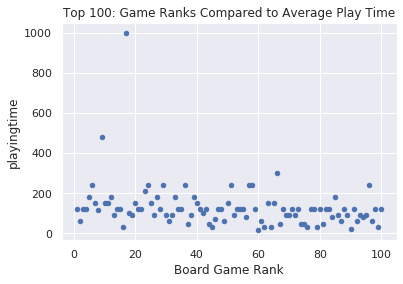

In [243]:
top_rank100.plot.scatter('Board Game Rank', 'playingtime');
plt.title('Top 100: Game Ranks Compared to Average Play Time');

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


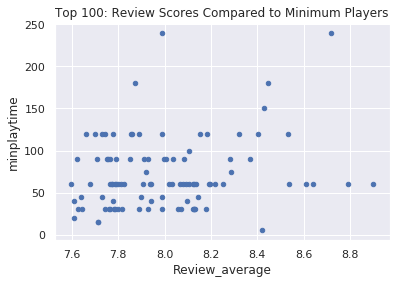

In [242]:
top_rank100.plot.scatter('Review_average', 'minplaytime');
plt.title('Top 100: Review Scores Compared to Minimum Players');

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


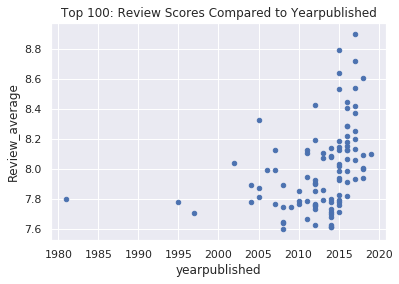

In [241]:
top_rank100_temp.plot.scatter('yearpublished', 'Review_average');
plt.title('Top 100: Review Scores Compared to Yearpublished');

In [201]:
category_list100=top_rank100['boardgamecategory']
category_list100 = category_list100.tolist()
temp=[]
for x in range(0,len(category_list100)):
  if "," in category_list100[x]:
    temp.extend(category_list100[x].split(','))
  else:
    temp.append(category_list100[x])
category_list100 = temp
category_list100 = [x.replace(" ","") for x in category_list100]

cat_list100_ten = pd.Series(category_list100).value_counts(normalize=True)[:10]

category_list100 = pd.Series(category_list100).value_counts()
category_list100

Economic                  36
Fantasy                   24
ScienceFiction            20
Fighting                  19
CardGame                  15
Adventure                 15
Miniatures                14
Civilization              13
Wargame                   13
Medieval                  13
TerritoryBuilding         10
CityBuilding               9
Industry/Manufacturing     9
Ancient                    8
Bluffing                   8
Animals                    8
Farming                    8
SpaceExploration           8
Mythology                  8
Novel-based                7
Political                  7
Dice                       7
Exploration                7
Horror                     6
Deduction                  6
Negotiation                5
Environmental              5
Movies/TV/Radiotheme       5
Puzzle                     5
Medical                    4
Spies/SecretAgents         4
Nautical                   4
CollectibleComponents      3
Renaissance                3
Transportation

In [202]:
cat_list100_ten

Economic          0.098630
Fantasy           0.065753
ScienceFiction    0.054795
Fighting          0.052055
CardGame          0.041096
Adventure         0.041096
Miniatures        0.038356
Civilization      0.035616
Wargame           0.035616
Medieval          0.035616
dtype: float64

Text(0, 0.5, 'Categories')

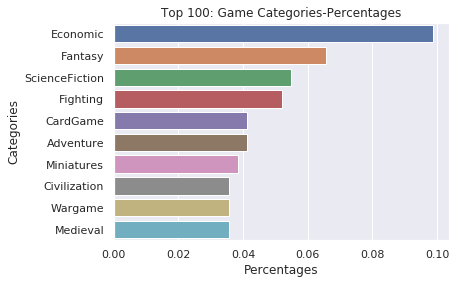

In [246]:
sns.barplot(cat_list100_ten,cat_list100_ten.index);
plt.title('Top 100: Game Categories-Percentages');
plt.xlabel('Percentages')
plt.ylabel('Categories')

Text(0, 0.5, 'Categories')

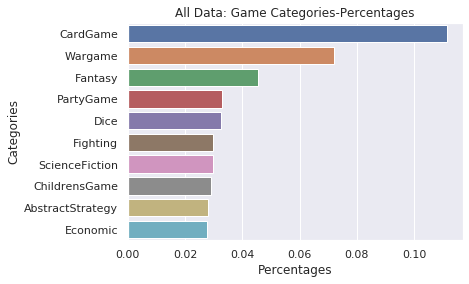

In [248]:
sns.barplot(cat_list_ten,cat_list_ten.index);
plt.title('All Data: Game Categories-Percentages');
plt.xlabel('Percentages')
plt.ylabel('Categories')

In [205]:
category_list100_sum = category_list100.sum()
category_list100_sum

365

In [206]:
top_ten_type100 =category_list100[:10].index
top_ten_type100= list(top_ten_type100)
top_ten_type100

['Economic',
 'Fantasy',
 'ScienceFiction',
 'Fighting',
 'CardGame',
 'Adventure',
 'Miniatures',
 'Civilization',
 'Wargame',
 'Medieval']

In [207]:
playtime100=top_rank100['playingtime']
playtime100 = playtime100.tolist()

playtime100_ten = pd.Series(playtime100).value_counts(normalize=True)[:10]

playtime100 = pd.Series(playtime100).value_counts()
playtime100

120     30
90      14
150      9
240      8
30       7
60       7
45       6
180      6
80       3
100      2
20       1
300      1
70       1
115      1
210      1
480      1
1000     1
15       1
dtype: int64

In [208]:
playtime_all=gameinfo['playingtime']
playtime_all = playtime_all.tolist()

playtime_all_top10 = pd.Series(playtime_all).value_counts(normalize=True)[:10]

playtime_all = pd.Series(playtime_all).value_counts()
playtime_all

30       3095
60       2517
45       1797
20       1680
120      1376
         ... 
280         1
450         1
290         1
17280       1
95          1
Length: 106, dtype: int64

In [209]:
playtime_all_top10

30     0.181387
60     0.147512
45     0.105316
20     0.098459
120    0.080642
90     0.077536
15     0.057551
180    0.040497
10     0.039032
0      0.029538
dtype: float64

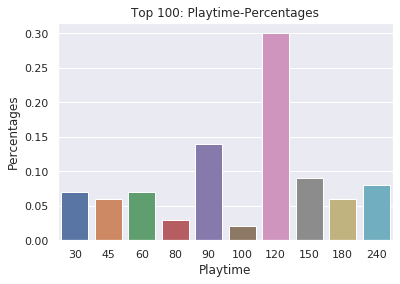

In [249]:
sns.barplot(playtime100_ten.index,playtime100_ten);
plt.xlabel('Playtime');
plt.ylabel('Percentages');
plt.title('Top 100: Playtime-Percentages');

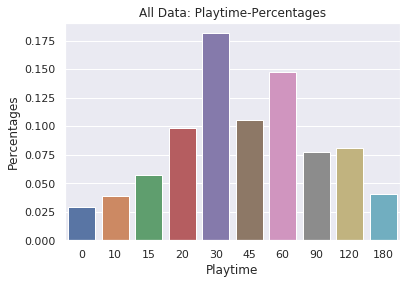

In [250]:
sns.barplot(playtime_all_top10.index,playtime_all_top10);
plt.xlabel('Playtime');
plt.ylabel('Percentages');
plt.title('All Data: Playtime-Percentages');

In [212]:
mechanic_list100=top_rank100['boardgamemechanic']
mechanic_list100 =mechanic_list100.tolist()
temp=[]
for x in range(0,len(mechanic_list100)):
  if "," in mechanic_list100[x]:
    temp.extend(mechanic_list100[x].split(','))
  else:
    temp.append(mechanic_list100[x])
mechanic_list100 = temp
mechanic_list100 = [x.replace(" ","") for x in mechanic_list100]

mech_list100_ten = pd.Series(mechanic_list100).value_counts(normalize=True)[:10]
print(mech_list100_ten, '\n')

mechanic_list100 = pd.Series(mechanic_list100).value_counts()
mechanic_list100

VariablePlayerPowers          0.095723
HandManagement                0.095723
CardDrafting                  0.071283
DiceRolling                   0.067210
SetCollection                 0.063136
WorkerPlacement               0.054990
AreaControl/AreaInfluence     0.046843
ModularBoard                  0.040733
CooperativePlay               0.040733
ActionPointAllowanceSystem    0.032587
dtype: float64 



VariablePlayerPowers           47
HandManagement                 47
CardDrafting                   35
DiceRolling                    33
SetCollection                  31
WorkerPlacement                27
AreaControl/AreaInfluence      23
ModularBoard                   20
CooperativePlay                20
ActionPointAllowanceSystem     16
TilePlacement                  16
SimultaneousActionSelection    14
Deck/PoolBuilding              14
AreaMovement                   13
GridMovement                   12
PointtoPointMovement           12
RolePlaying                     9
Route/NetworkBuilding           9
Partnerships                    9
VariablePhaseOrder              9
Auction/Bidding                 8
Storytelling                    7
PlayerElimination               6
Trading                         6
Action/MovementProgramming      6
Memory                          5
Voting                          4
TakeThat                        4
PressYourLuck                   4
Campaign/Battl

In [213]:
top_ten_mech =mechanic_list100[:10].index
top_ten_mech= list(top_ten_mech)
top_ten_mech

['VariablePlayerPowers',
 'HandManagement',
 'CardDrafting',
 'DiceRolling',
 'SetCollection',
 'WorkerPlacement',
 'AreaControl/AreaInfluence',
 'ModularBoard',
 'CooperativePlay',
 'ActionPointAllowanceSystem']

In [0]:
temp =gameinfo[gameinfo['boardgamemechanic'] != np.nan]
mechanic_list = temp['boardgamemechanic']
mechanic_list =mechanic_list.tolist()
temp=[]
for x in range(0,len(mechanic_list)):
  if "," in mechanic_list[x]:
    temp.extend(mechanic_list[x].split(','))
  else:
    temp.append(mechanic_list[x])
mechanic_list = temp
mechanic_list = [x.replace(" ","") for x in mechanic_list]

mechanic_list_ten = pd.Series(mechanic_list).value_counts(normalize=True)[:10]

mechanic_list = pd.Series(mechanic_list).value_counts()
mechanic_list

In [0]:
top_ten_mech_all =mechanic_list[:10].index
top_ten_mech_all= list(top_ten_mech_all)
top_ten_mech_all

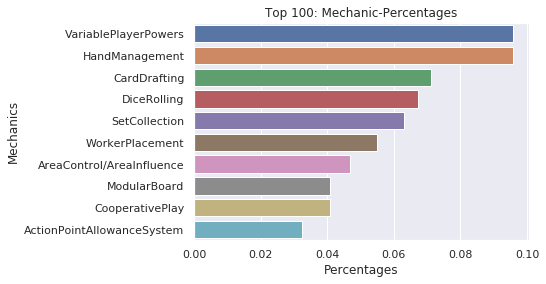

In [261]:
sns.barplot(mech_list100_ten,mech_list100_ten.index);
plt.xlabel('Percentages');
plt.ylabel('Mechanics');
plt.title('Top 100: Mechanic-Percentages');

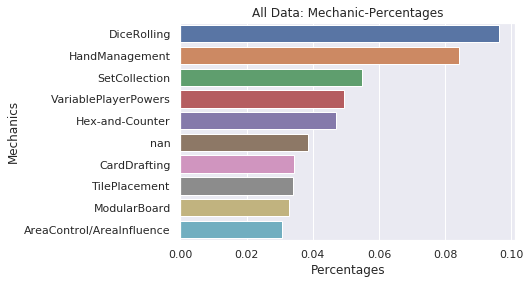

In [262]:
sns.barplot(mechanic_list_ten,mechanic_list_ten.index);
plt.xlabel('Percentages');
plt.ylabel('Mechanics');
plt.title('All Data: Mechanic-Percentages');

In [218]:
round(gameinfo['maxplayers'].mean())

6

In [219]:
gameinfo['minplayers'] = gameinfo['minplayers'].replace(0,round(gameinfo['minplayers'].mean()))
gameinfo['maxplayers'] = gameinfo['maxplayers'].replace(0,round(gameinfo['maxplayers'].mean()))
gameinfo

,Abstract Game Rank,Board Game Rank,Childrens Game Rank,Customizable Rank,Family Game Rank,Party Game Rank,Strategy Game Rank,Thematic Rank,War Game Rank,Review_average,averageweight,Review_bayesaverage,boardgamecategory,boardgamedesigner,boardgamemechanic,id,maxplayers,maxplaytime,median,minage,minplayers,minplaytime,owned,playingtime,primary,stddev,type,usersrated,yearpublished
0,NaN,327.0,NaN,NaN,84.0,NaN,313.0,NaN,NaN,7.19118,2.3399,7.03556,Negotiation,Klaus Teuber,"Dice Rolling, Modular Board, Route/Network Bui...",13,4,120,0,10,3,60,125254,120,Catan,1.47121,boardgame,85332,1995
1,NaN,151.0,NaN,NaN,23.0,NaN,NaN,NaN,NaN,7.42605,1.9247,7.32084,"City Building, Medieval, Territory Building",Klaus-Jürgen Wrede,"Area Control / Area Influence, Tile Placement",822,5,45,0,8,2,30,121717,45,Carcassonne,1.30292,boardgame,85052,2000
2,NaN,74.0,NaN,NaN,7.0,NaN,87.0,NaN,NaN,7.63799,2.4220,7.54432,Medical,Matt Leacock,"Action Point Allowance System, Cooperative Pla...",30549,4,45,0,8,2,45,123067,45,Pandemic,1.32212,boardgame,83486,2008
3,NaN,45.0,NaN,NaN,3.0,NaN,48.0,NaN,NaN,7.78118,2.3397,7.68858,"Ancient, Card Game, City Building, Civilization",Antoine Bauza,"Card Drafting, Hand Management, Set Collection...",68448,7,30,0,10,2,30,91037,30,7 Wonders,1.27559,boardgame,69132,2010
4,NaN,76.0,NaN,NaN,NaN,NaN,76.0,NaN,NaN,7.64470,2.3623,7.54296,"Card Game, Medieval",Donald X. Vaccarino,"Card Drafting, Deck / Pool Building, Hand Mana...",36218,4,30,0,13,2,30,88729,30,Dominion,1.42599,boardgame,68284,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17058,NaN,12961.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.93667,1.0000,5.51052,"Animals, Childrens Game","Alan R. Moon, Aaron Weissblum",nan,10809,5,20,0,5,3,20,46,20,Immer oben auf!,1.31896,boardgame,30,2004
17059,NaN,15499.0,NaN,NaN,NaN,NaN,NaN,NaN,2861.0,4.74000,2.3750,5.47984,"Civilization, Environmental, Modern Warfare, P...","Frank Zuuring, Peter Zuuring","Area Movement, Campaign / Battle Card Driven, ...",23257,4,120,0,8,2,120,57,120,Antarctica (first edition),1.86362,boardgame,30,2006
17060,NaN,14315.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.40000,2.5000,5.49719,"Adventure, Deduction",Thomas Kotulla,nan,9272,6,90,0,8,2,90,124,90,Jade König,1.27410,boardgame,30,1986
17061,NaN,14317.0,NaN,NaN,NaN,NaN,NaN,NaN,2751.0,5.80000,2.7500,5.49718,"Napoleonic, Wargame",Roger Sandell,Hex-and-Counter,13392,2,0,0,12,2,0,241,0,Perfidious Albion: Napoleon's (Hypothetical) I...,1.84662,boardgame,30,1997


In [220]:
minplayers_all=gameinfo['minplayers']
minplayers_all = minplayers_all.tolist()

minplayers_all_top10 = pd.Series(minplayers_all).value_counts(normalize=True)[:10]

minplayers_all = pd.Series(minplayers_all).value_counts()
minplayers_all

2     12094
1      2396
3      2089
4       397
5        46
6        17
8        14
7         8
10        1
9         1
dtype: int64

In [221]:
minplayers_100=top_rank100['minplayers']
minplayers_100 = minplayers_100.tolist()

minplayers_100_top10 = pd.Series(minplayers_100).value_counts(normalize=True)[:10]

minplayers_100 = pd.Series(minplayers_100).value_counts()
minplayers_100

2    63
1    30
3     6
5     1
dtype: int64

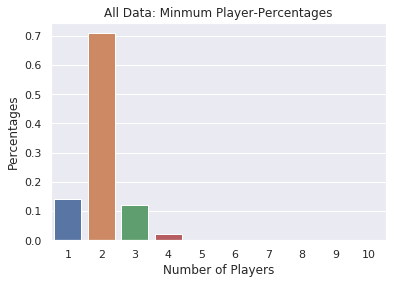

In [263]:
sns.barplot(minplayers_all_top10.index,minplayers_all_top10);
plt.xlabel('Number of Players');
plt.ylabel('Percentages');
plt.title('All Data: Minmum Player-Percentages');

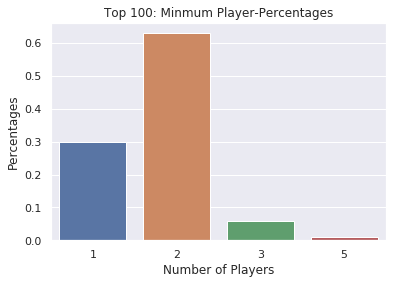

In [264]:
sns.barplot(minplayers_100_top10.index,minplayers_100_top10);
plt.xlabel('Number of Players');
plt.ylabel('Percentages');
plt.title('Top 100: Minmum Player-Percentages');

In [224]:
maxplayers_all=gameinfo['maxplayers']
maxplayers_all = maxplayers_all.tolist()

mmaxplayers_all_top10 = pd.Series(maxplayers_all).value_counts(normalize=True)[:10]

maxplayers_all = pd.Series(maxplayers_all).value_counts()
maxplayers_all

4      5193
2      3556
6      3364
5      2341
8       969
10      310
7       265
1       245
3       225
12      169
99       99
9        66
16       55
20       51
15       38
24       13
14       11
30       10
36       10
100       9
18        8
11        6
17        6
13        5
50        4
22        4
40        4
21        3
999       3
32        2
52        2
75        2
33        2
362       1
48        1
64        1
45        1
34        1
42        1
31        1
41        1
25        1
200       1
38        1
68        1
127       1
dtype: int64

In [225]:
maxplayers_100=top_rank100['maxplayers']
maxplayerss_100 = maxplayers_100.tolist()

maxplayers_100_top10 = pd.Series(maxplayers_100).value_counts(normalize=True)[:10]

maxplayers_100 = pd.Series(maxplayers_100).value_counts()
maxplayers_100

4     54
5     23
6      9
2      8
8      3
7      2
10     1
Name: maxplayers, dtype: int64

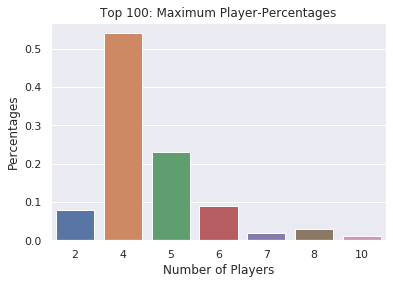

In [258]:
sns.barplot(maxplayers_100_top10.index,maxplayers_100_top10);
plt.xlabel('Number of Players');
plt.ylabel('Percentages');
plt.title('Top 100: Maximum Player-Percentages');

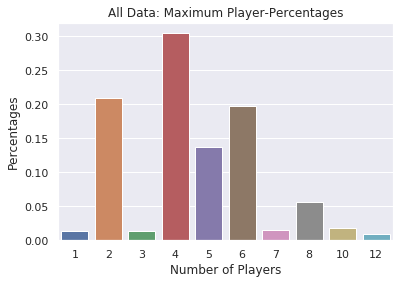

In [260]:
sns.barplot(mmaxplayers_all_top10.index,mmaxplayers_all_top10);
plt.xlabel('Number of Players');
plt.ylabel('Percentages');
plt.title('All Data: Maximum Player-Percentages');